<a href="https://colab.research.google.com/github/ez945y/Kaggle_ML/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import tensorflow as tf
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [ ]:
import pandas as pd
import numpy as np
df_train = pd.read_csv('/content/drive/MyDrive/taianic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/taianic/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
for i in df_train['PassengerId'][0:11]:
  print(i)

1
2
3
4
5
6
7
8
9
10
11


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe().T.style.background_gradient(subset=['min','50%', 'max'], cmap='winter')

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


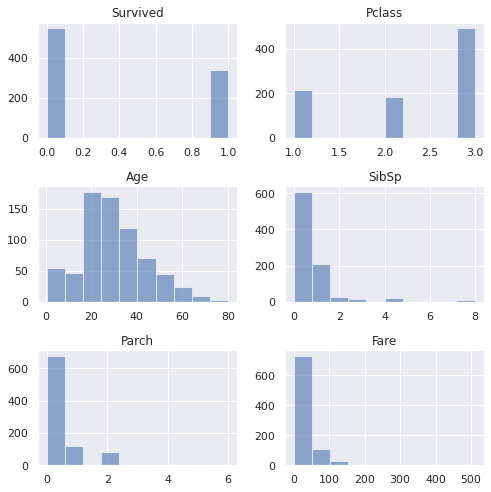

In [ ]:
aa = df_train.drop('PassengerId',axis=1)
aa.hist(alpha=0.6, figsize=(7,7))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Sex,Survived
0,female,0.742
1,male,0.189


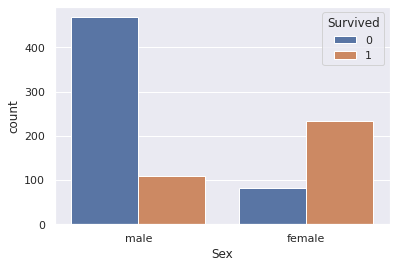

In [ ]:
sns.countplot(df_train['Sex'], hue=df_train['Survived'])
display(df_train[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().round(3))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


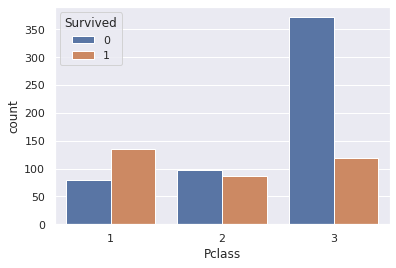

In [ ]:
sns.countplot(df_train['Pclass'], hue=df_train['Survived'])
display(df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().round(3))

Fare        
Survived      0       1
Pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517

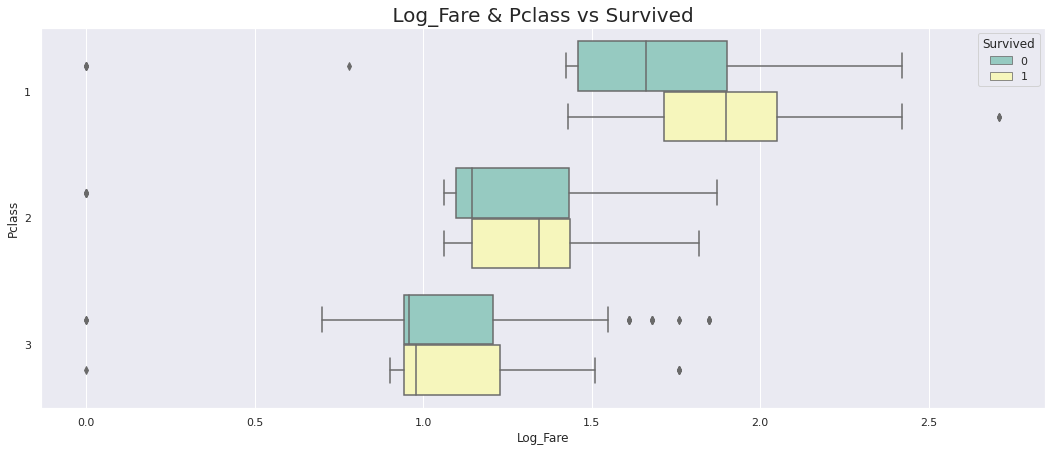

In [ ]:
fig, ax = plt.subplots( figsize = (18,7) )
df_train['Log_Fare'] = (df_train['Fare']+1).map(lambda x : np.log10(x) if x > 0 else 0)
sns.boxplot(y='Pclass', x='Log_Fare',hue='Survived',data=df_train, orient='h',ax=ax, palette="Set3")
ax.set_title(' Log_Fare & Pclass vs Survived ',fontsize = 20)
pd.pivot_table(df_train,values = ['Fare'], index = ['Pclass'], columns= ['Survived'] ,aggfunc = 'median' ).round(3)

In [ ]:
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].median())

# Making Bins
df_train['FareBin_4'] = pd.qcut(df_train['Fare'], 4)
df_train['FareBin_5'] = pd.qcut(df_train['Fare'], 5)
df_train['FareBin_6'] = pd.qcut(df_train['Fare'], 6)

label = LabelEncoder()
df_train['FareBin_Code_4'] = label.fit_transform(df_train['FareBin_4'])
df_train['FareBin_Code_5'] = label.fit_transform(df_train['FareBin_5'])
df_train['FareBin_Code_6'] = label.fit_transform(df_train['FareBin_6'])

# cross tab
df_4 = pd.crosstab(df_train['FareBin_Code_4'],df_train['Pclass'])
df_5 = pd.crosstab(df_train['FareBin_Code_5'],df_train['Pclass'])
df_6 = pd.crosstab(df_train['FareBin_Code_6'],df_train['Pclass'])

In [ ]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

# Making Bins
df_test['FareBin_4'] = pd.qcut(df_test['Fare'], 4)
df_test['FareBin_5'] = pd.qcut(df_test['Fare'], 5)
df_test['FareBin_6'] = pd.qcut(df_test['Fare'], 6)

label = LabelEncoder()
df_test['FareBin_Code_4'] = label.fit_transform(df_test['FareBin_4'])
df_test['FareBin_Code_5'] = label.fit_transform(df_test['FareBin_5'])
df_test['FareBin_Code_6'] = label.fit_transform(df_test['FareBin_6'])

# cross tab
df_4 = pd.crosstab(df_test['FareBin_Code_4'],df_test['Pclass'])
df_5 = pd.crosstab(df_test['FareBin_Code_5'],df_test['Pclass'])
df_6 = pd.crosstab(df_test['FareBin_Code_6'],df_test['Pclass'])

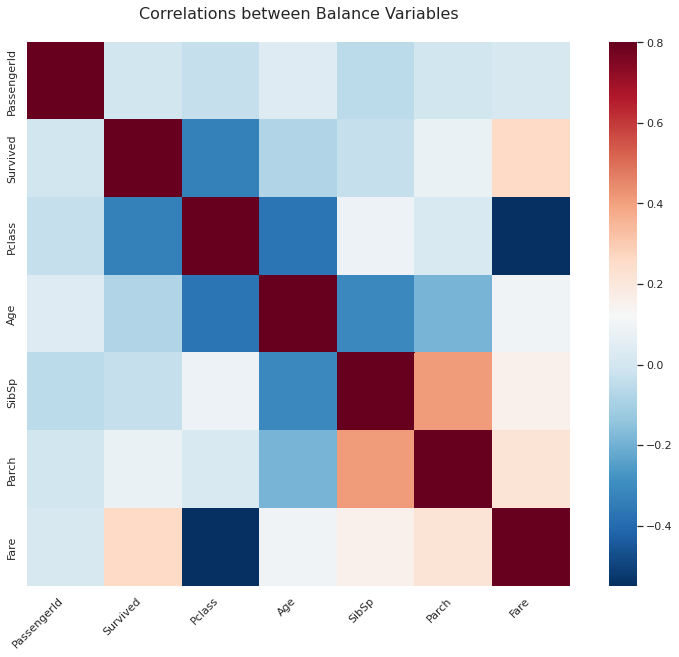

In [ ]:
corrmat = df_train[0:].corr()
fig, ax = plt.subplots(figsize=(14,10))   
sns.heatmap(data=corrmat, vmax=.8, square=True, cmap="RdBu_r", annot_kws={'fontsize':10,'fontweight':'bold'})
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlations between Balance Variables\n', fontsize=16)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


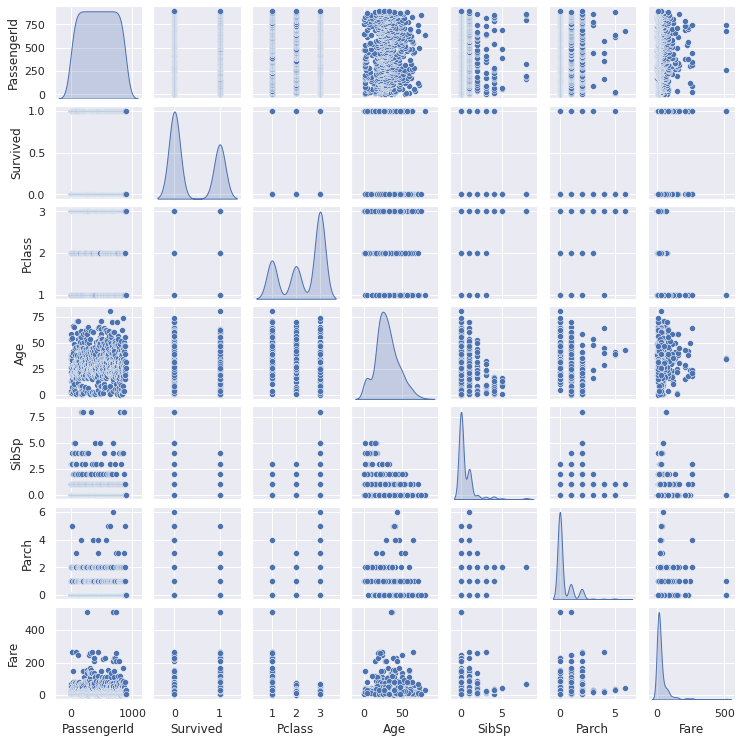

In [ ]:
sns.set()
cols = df_train.columns[0:]
sns.pairplot(df_train[cols], size = 1.5, diag_kind="kde",palette="husl")
plt.show()

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
FareBin_Code_5,0,0.000000


In [ ]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Pclass,0,0.000000


In [ ]:
df_train = df_train.drop(['Cabin'],axis =1)
df_test = df_test.drop(['Cabin'],axis =1)

In [ ]:
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train['Title'] = df_train['Title'].replace(['Capt', 'Col', 'Countess', 'Don',
                                               'Dr', 'Dona', 'Jonkheer', 
                                                'Major','Rev','Sir'],'Rare') 
df_train['Title'] = df_train['Title'].replace(['Mlle', 'Ms','Mme'],'Miss')
df_train['Title'] = df_train['Title'].replace(['Lady'],'Mrs')
df_train['Title'] = df_train['Title'].map({"Mr":0, "Rare" : 1, "Master" : 2,"Miss" : 3, "Mrs" : 4 })
Ti = df_train.groupby('Title')['Age'].median()
Ti

Title
0    30.0
1    49.0
2     3.5
3    21.5
4    35.0
Name: Age, dtype: float64

In [ ]:
Ti_pred = df_train.groupby('Title')['Age'].median().values
df_train['Ti_Age'] = df_train['Age']
# Filling the missing age
for i in range(0,5):
 # 0 1 2 3 4 5
    df_train.loc[(df_train.Age.isnull()) & (df_train.Title == i),'Ti_Age'] = Ti_pred[i]
df_train['Ti_Age'] = df_train['Ti_Age'].astype('int')
df_train['Ti_Minor'] = ((df_train['Ti_Age']) < 16.0) * 1

In [ ]:
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Title'].replace(['Capt', 'Col', 'Countess', 'Don',
                                               'Dr', 'Dona', 'Jonkheer', 
                                                'Major','Rev','Sir'],'Rare') 
df_test['Title'] = df_test['Title'].replace(['Mlle', 'Ms','Mme'],'Miss')
df_test['Title'] = df_test['Title'].replace(['Lady'],'Mrs')
df_test['Title'] = df_test['Title'].map({"Mr":0, "Rare" : 1, "Master" : 2,"Miss" : 3, "Mrs" : 4 })
Ti = df_test.groupby('Title')['Age'].median()
Ti

Title
0    28.5
1    44.0
2     7.0
3    22.0
4    36.5
Name: Age, dtype: float64

In [ ]:
Ti_pred = df_test.groupby('Title')['Age'].median().values
df_test['Ti_Age'] = df_test['Age']
# Filling the missing age
for i in range(0,5):
 # 0 1 2 3 4 5
    df_test.loc[(df_test.Age.isnull()) & (df_test.Title == i),'Ti_Age'] = Ti_pred[i]
df_test['Ti_Age'] = df_test['Ti_Age'].astype('int')
df_test['Ti_Minor'] = ((df_test['Ti_Age']) < 16.0) * 1

In [ ]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mode()[0])
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mode()[0])
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mode()[0])

In [ ]:
from sklearn.preprocessing import StandardScaler

def data_preprocessing(df_input):
    sc = StandardScaler()   
    df=sc.fit_transform(df_input)
    return df

In [ ]:
df_train['Sex_Code'] = df_train['Sex'].map({'female' : 1, 'male' : 0}).astype('int')
df_test['Sex_Code'] = df_test['Sex'].map({'female' : 1, 'male' : 0}).astype('int')

In [ ]:
df_train['Family'] = df_train['SibSp']+ df_train['Parch']
df_test['Family'] = df_test['SibSp']+ df_test['Parch']

In [ ]:
compare = ['Sex_Code','Pclass''FareBin_Code_5',"Embarked"]
X = df_train[['Ti_Minor','Ti_Age','Sex_Code','Pclass','FareBin_Code_5',"Embarked",'Family']]
y = df_train['Survived']
df_test = df_test[['Ti_Minor','Ti_Age','Sex_Code','Pclass','FareBin_Code_5','Embarked','Family']]

In [ ]:
X['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
df_test['label'] = -1
data = pd.concat([X, df_test])
index = data["Embarked"].value_counts().index

data["Embarked"] = LabelEncoder().fit_transform(data["Embarked"])
item_dummies = pd.get_dummies(data["Embarked"])
item_dummies.columns = ["Embarked" +'_'+ col for col in index]
data = pd.concat([data, item_dummies], axis=1)
data = data.drop("Embarked", axis = 1)
data

,Ti_Minor,Ti_Age,Sex_Code,Pclass,FareBin_Code_5,Family,label,Embarked_S,Embarked_C,Embarked_Q
0,0,22,0,3,0,1,NaN,0,0,1
1,0,38,1,1,4,1,NaN,1,0,0
2,0,26,1,3,1,0,NaN,0,0,1
3,0,35,1,1,4,1,NaN,0,0,1
4,0,35,0,3,1,0,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,0,28,0,3,1,0,-1.0,0,0,1
414,0,39,1,1,4,0,-1.0,1,0,0
415,0,38,0,3,0,0,-1.0,0,0,1
416,0,28,0,3,1,0,-1.0,0,0,1


In [ ]:
data['Ti_Age'] = data_preprocessing(pd.DataFrame(data['Ti_Age']))
data['Ti_Age'] = data_preprocessing(pd.DataFrame(data['Ti_Age']))
X = data[data['label'] != -1]
test = data[data['label'] == -1]

X = X.drop(['label'],axis=1)
test = test.drop(['label'],axis=1)

In [ ]:
X

,Ti_Minor,Ti_Age,Sex_Code,Pclass,FareBin_Code_5,Family,Embarked_S,Embarked_C,Embarked_Q
0,0,-0.563920,0,3,0,1,0,0,1
1,0,0.650052,1,1,4,1,1,0,0
2,0,-0.260427,1,3,1,0,0,0,1
3,0,0.422433,1,1,4,1,0,0,1
4,0,0.422433,0,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,-0.184553,0,2,2,0,0,0,1
887,0,-0.791539,1,1,3,0,0,0,1
888,0,-0.639793,1,3,3,3,0,0,1
889,0,-0.260427,0,1,3,0,1,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022, shuffle=True)
# shape of the dataset
print('Shape of training data :',x_train.shape)
print('Shape of testing data :',x_test.shape)

Shape of training data : (596, 9)
Shape of testing data : (295, 9)


In [ ]:
model = xgb.XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.66, subsample = 0.3,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =250,max_depth=5 ,random_state=2,min_samples_split =2, oob_score=True)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=250, oob_score=True,
                       random_state=2)

In [ ]:
start = time.time
()

model.fit(x_train, y_train, early_stopping_rounds=5 ,eval_set=[(x_test, y_test)], verbose=False)

end = time.time()

print(f'Training took {round(end-start,2)} seconds to be completed!')

TypeError: ignored

In [ ]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

In [ ]:
model.score(x_train , y_train), model.score(x_test , y_test)

(0.8422818791946308, 0.8305084745762712)

In [ ]:
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
print(rmsle(y_test, predict_test))

0.41984662251907895


In [ ]:
predict_test = model.predict(test)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/taianic/gender_submission.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


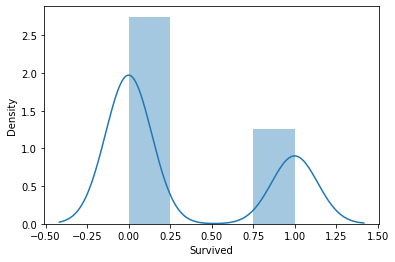

In [ ]:
submission['Survived'] = predict_test

sns.distplot(submission["Survived"])

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv("submissiongogo.csv", index = False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = df_train['Survived']
features = ['Pclass','Sex','SibSp','Parch']
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
model.fit(X,y)
model.score(X , y)

0.8159371492704826

In [ ]:
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId':df_test.PassengerId,'Survived':predictions})
output.to_csv('submissiongo.csv',index=False)
print('Your submissison was successfully saved !')

Your submissison was successfully saved !
